In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torch_geometric rpy2==3.5.1
!pip install umap-learn
!pip install igraph
!pip install find-julia
!wget https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.1-linux-x86_64.tar.gz
!tar zxvf julia-1.8.1-linux-x86_64.tar.gz -C /usr/local --strip-components 1
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/BregmanClustering.git --no-deps
!pip install leidenalg
import os
import pickle
from sys import platform
import BregmanTests
os.chmod(BregmanTests.__path__[0]+"/install_algos.sh",777)
if platform == "win32":
    os.environ["R_HOME"] = r"C:\\Program Files\R\R-4.2.3"
else:
    ### Uncomment line below if in Google Colab environment
    print(os.path.isfile(BregmanTests.__path__[0]+"/install_algos.sh"))
    ### Done

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 15.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 26.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318082 sha256=bc08472fb1e886777f69e25b633f32f688d24a3c3b869a2032429d3f83597a90
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=c17304dc37a39564bba0f98606297c023fca198127b5d2b657cede7ff6fab6e5
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built rpy2 torch_geometric
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uni

In [3]:
from BregmanTests.benchmark import *
n_average = 20
n = 600
n_clusters = 3
d = 1
sizes = [ n // n_clusters ]*np.ones( n_clusters, dtype = int )


Accessing /usr/local/lib/python3.10/dist-packages/BregmanTests/install_algos.sh
Installing R packages...
 This step takes about 5 min...



(as ‘lib’ is unspecified)







































	‘/tmp/Rtmpggg4jP/downloaded_packages’



In [4]:
break

SyntaxError: ignored

In [ ]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
benchmark = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=True,
                    initializer = 'chernoff',
                    hard_clustering=True)
benchmark.run_test(n_average=1,cluster_sizes=sizes,\
                 b=5,\
                 a_range=[ 5,7,9,11,13,15 ],\
                 r_range = [ 0,1,2,3,4,5 ],\
                 dense=False,\
                 binary=True,\
                 file_endings=".jpeg",\
                 n_iters=25)

## Test 2_1

In [ ]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
benchmark = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'chernoff',
                    hard_clustering=False)
stats = benchmark.run_2_1(n_average=1,
                            cluster_sizes=sizes,
                            b=5,
                            a_range= a_range,
                            r_range = r_range,
                            dense=False,
                            binary=True,
                            n_iters=25)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

## Test 2_2

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
d_range = np.arange(1,6)
mu_range = np.linspace(0,6,20)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                  )\
                  .run_2_2(n_average=10,
                            cluster_sizes=sizes,
                             d_range = d_range,
                             mu_range = mu_range,
                             dense=True,
                             binary=False)
with open('test_2_2.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_2.pickle" "/content/drive/MyDrive"

## Test 2_3

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
d_range = np.arange(1,5)
a_range = np.linspace(5,14,10)
lambda_range = np.arange(1,6)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                 )\
                  .run_2_3(n_average=10,
                            cluster_sizes=sizes,
                            d_range= d_range,
                            lambda_range = lambda_range,
                            a_range = a_range,
                            b = 5,
                            dense=False,
                            binary=False)
with open('test_2_3.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_3.pickle" "/content/drive/MyDrive"

## Test 2_4

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,10)
w_averages = np.linspace(1,5,10)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_4(n_average=10,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_4.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_4.pickle" "/content/drive/MyDrive"

## Test 2_5

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,5)
w_averages = np.array([1,3,6,9,12])
stats = BregmanBenchmark(att_variance=n_average,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_5(n_average=n_average,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_5.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_5.pickle" "/content/drive/MyDrive"

In [ ]:
test_2_5=None
with open("/content/drive/MyDrive/test_2_5.pickle", 'rb') as handle:
    test_2_5 = pickle.load(handle)
test_2_5.keys()
df = pd.DataFrame.from_dict(test_2_5)
# labels = [ 'EM-GMM', 'SC', 'Algo1', 'attSBM','IR_sLS']
# algos = ["attributes", "graph", "ours", "attSBM", "IR_sLS"]
# saveFig = True
# for varying in ["graph","attributes"]:
#   curves = []
#   curves_std = []
#   for algo in algos:
#     curves.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI"])
#     curves_std.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI_std"])
#   if varying == 'graph':
#     x = df.loc[(df['varying'] == "graph")]["weights_avg"].unique()
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_att_' + str(2)  +  '_nAverage' + str(n_average) + '.jpeg'
#     plotting( x, curves, labels, curves_std = curves_std, xticks = x, xlabel = 'weights_avg', saveFig = True, fileName = fileName )
#     plt.close()
#   elif varying == 'attributes':
#     x = df.loc[(df['varying'] == "attributes")]["attributes_avg"].unique()
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_w_' + str(2) + '_nAverage_' + str(n_average) + '.jpeg'
#     plotting( x , curves, labels, curves_std = curves_std, xticks = x, xlabel = 'attributes_avg', saveFig = True, fileName = fileName )
#     plt.close()

## Test Real Data

In [5]:
edgeSimilarity = "jaccard"

Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!


['NMI', 'ARI']

CURRENT DATASET:  CiteSeer


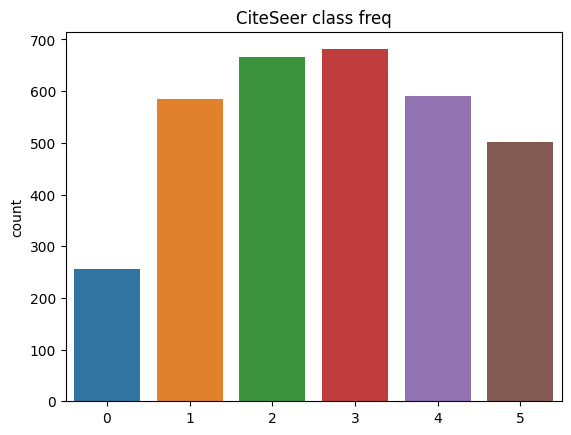

FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph

CURRENT DATASET:  Cora


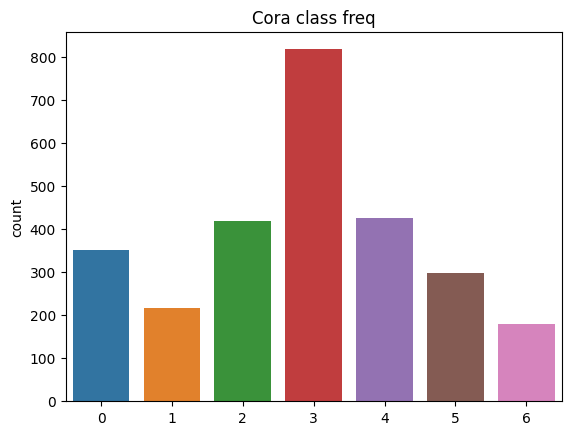

FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes

CURRENT DATASET:  Cornell


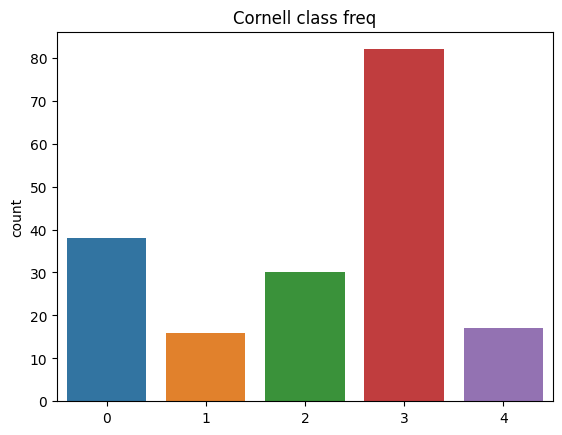

FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the attributes
FIT LEIDEN
Initialisation chosen from the graph

CURRENT DATASET:  Texas


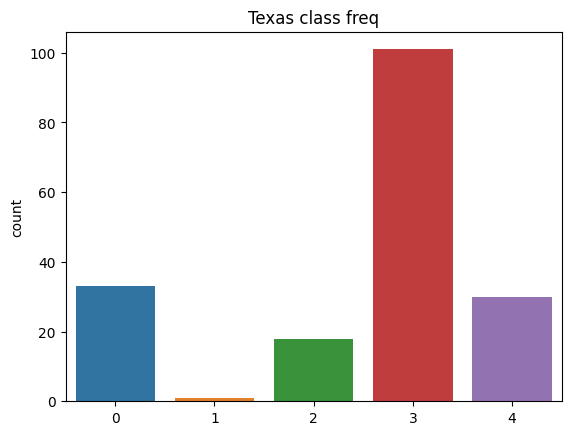

FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph

CURRENT DATASET:  Wisconsin


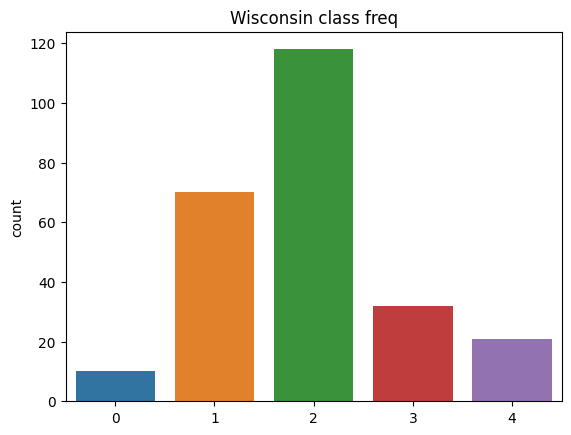

FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph
FIT LEIDEN
Initialisation chosen from the graph


{'NMI': [0.21208172074091078,
  0.18706725462350007,
  0.17990808207428005,
  0.23022683945998196,
  0.18988696819854478,
  0.17990808207428005,
  0.012793775010289282,
  0.26304303525973327,
  0.2599317923771575,
  0.24261318711613994,
  0.27117551362523773,
  0.3545203291741167,
  0.34017921780375027,
  0.2682675474704995,
  0.24921799114751925,
  0.34017921780375027,
  0.01378077197743811,
  0.3309619309290932,
  0.33051741067821533,
  0.2869852424552733,
  0.3212782752973263,
  0.31893482907596127,
  0.05482134054399514,
  0.43793789488430723,
  0.45626820799150936,
  0.05482134054399514,
  0.08217155290042287,
  0.40171522702198664,
  0.42069646911847436,
  0.46465891659908987,
  0.09474393116180906,
  0.31377106957642187,
  0.06146263041572827,
  0.38448359183400926,
  0.43890884957969123,
  0.06146263041572827,
  0.015408869980161754,
  0.39272825055941557,
  0.3307901598755094,
  0.4104191196076205,
  0.20970449797930915,
  0.3315395499107973,
  0.05450387007912746,
  0.3790461

In [5]:
attributes_distribution = "bernoulli"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
benchmark = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'chernoff',
                    hard_clustering=True)
scores = benchmark.run_real_data(n_iters=25,n_runs=5,
                                 edgeSimilarity=edgeSimilarity,
                                 weightSimilarity="gaussian",
                                 attributesSimilarity="hamming")
scores

In [ ]:
with open(f'/content/drive/MyDrive/test_real_data_{edgeSimilarity}.pickle', 'wb') as handle:
    pickle.dump(scores, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
scores=None
with open(f"/content/drive/MyDrive/test_real_data_{edgeSimilarity}.pickle", 'rb') as handle:
    scores = pickle.load(handle)
scores.keys()

dict_keys(['NMI', 'NMI_std', 'ARI', 'ARI_std', 'algorithm', 'dataset'])

In [7]:
df = pd.DataFrame(scores)
df_grouped = df.groupby(by="dataset")
for key, item in df_grouped:
    print(df_grouped.get_group(key), "\n\n")

        NMI       NMI_std       ARI   ARI_std      algorithm   dataset
0  0.212082  7.361810e-03  0.045819  0.005677      both_hard  CiteSeer
1  0.187067  9.096359e-03  0.025323  0.004235      both_soft  CiteSeer
2  0.179908  4.784781e-03  0.023704  0.002746            net  CiteSeer
3  0.230227  1.822209e-02  0.147488  0.023655            att  CiteSeer
4  0.189887  0.000000e+00  0.089045  0.000000         kmeans  CiteSeer
5  0.179908  4.784781e-03  0.023704  0.002746         leiden  CiteSeer
6  0.012794  1.734723e-18 -0.000623  0.000000             SC  CiteSeer
7  0.263043  0.000000e+00  0.181404  0.000000     SC_jaccard  CiteSeer
8  0.259932  0.000000e+00  0.180601  0.000000  SC_gaussian_1  CiteSeer
9  0.242613  0.000000e+00  0.161110  0.000000  SC_gaussian_2  CiteSeer 


         NMI       NMI_std       ARI   ARI_std      algorithm dataset
10  0.271176  3.151740e-02  0.056012  0.016452      both_hard    Cora
11  0.354520  8.596031e-02  0.192604  0.113028      both_soft    Cora
12  0.

In [8]:
df

,NMI,NMI_std,ARI,ARI_std,algorithm,dataset
0,0.212082,7.361810e-03,0.045819,5.677289e-03,both_hard,CiteSeer
1,0.187067,9.096359e-03,0.025323,4.234636e-03,both_soft,CiteSeer
2,0.179908,4.784781e-03,0.023704,2.745544e-03,net,CiteSeer
3,0.230227,1.822209e-02,0.147488,2.365508e-02,att,CiteSeer
4,0.189887,0.000000e+00,0.089045,0.000000e+00,kmeans,CiteSeer
5,0.179908,4.784781e-03,0.023704,2.745544e-03,leiden,CiteSeer
6,0.012794,1.734723e-18,-0.000623,0.000000e+00,SC,CiteSeer
7,0.263043,0.000000e+00,0.181404,0.000000e+00,SC_jaccard,CiteSeer
8,0.259932,0.000000e+00,0.180601,0.000000e+00,SC_gaussian_1,CiteSeer
9,0.242613,0.000000e+00,0.161110,0.000000e+00,SC_gaussian_2,CiteSeer


In [ ]:
from google.colab import runtime
runtime.unassign()

# Begin Plots

In [ ]:
from BregmanTests.utils import *

In [ ]:
test_2_1=None
with open("/content/drive/MyDrive/test_2_1.pickle", 'rb') as handle:
    test_2_1 = pickle.load(handle)
test_2_1.keys()

In [ ]:
scatter_(test_2_1,'a', 'r', 'ARI')

In [ ]:
scatter_with_colorbar(test_2_1,'a', 'r', 'ARI')

In [ ]:
test_2_4=None
SIZE_TITLE = 24
SIZE_LABELS = 24
SIZE_TICKS = 18
SIZE_LEGEND = 18
with open("/content/drive/MyDrive/test_2_4.pickle", 'rb') as handle:
    test_2_4 = pickle.load(handle)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = np.array(test_2_4["lambda_att"]),np.array(test_2_4["lambda_w"]),np.array(test_2_4["ARI"])
xlabel="attributes_avg"
ylabel="weights_avg"
C = ax.scatter(x=1/x,y=1/y,c=z,cmap="coolwarm")
plt.ylim(0.9,3.5)
ticks = np.linspace(z.min(), z.max(), 5, endpoint=True)
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI',ticks=ticks)
cb.set_label(label='ARI', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

In [ ]:
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0]).T
make_contour_plot(vals_x,vals_y,z,x_label="a",y_label="r",filename="contour_plot_2_1.jpeg")

In [ ]:
test_2_2=None
with open("/content/drive/MyDrive/test_2_2.pickle", 'rb') as handle:
    test_2_2 = pickle.load(handle)
test_2_2.keys()

In [ ]:
scatter_(test_2_2,'d', 'mu', 'ARI')

In [ ]:
x,y,z = test_2_2["d"],test_2_2["mu"],test_2_2["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
# x,y = np.meshgrid(vals_x,vals_y)
z = np.array(z).reshape(len(vals_x),len(vals_y)).T
make_contour_plot(vals_x,vals_y,z,x_label="d",y_label="mu",filename="contour_plot_2_2.jpeg")

In [ ]:
test_2_3=None
with open("/content/drive/MyDrive/test_2_3.pickle", 'rb') as handle:
    test_2_3 = pickle.load(handle)
test_2_3.keys()

In [ ]:
x,y,z,data = test_2_3["d"],test_2_3["lambda"], test_2_3["a"],test_2_3["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
vals_z = np.unique(z)
"""
len(X) == N is the number of columns in data,
len(Y) == M is the number of rows in data.
len(Z) == P is the depth of data
DATA = M x N X P
"""
X = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
data = np.array(data).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
x_label="d"
y_label="lambda"
z_label = "a"

kw = {
        # 'vmin': data.min(),
        # 'vmax': data.max()
    }

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot contour surfaces
    ### This is the X x Y plane for z=zmax
_ = ax.contourf(
            X[:, :, -1], Y[:, :, -1], data[:, :, -1],
            zdir='z', offset=zmax, **kw
        )

    ### This is the X x Y plane for z=zmin
_ = ax.contourf(
            X[:, :, 0], Y[:, :, 0], data[:, :, 0],
            zdir='z', offset=zmin, **kw
        )

    ### This is the X x Z plane for y=ymax
_ = ax.contourf(
            X[-1, :, :], data[-1, :, :], Z[-1, :, :],
            zdir='y', offset=ymax, **kw
        )

    ### This is the X x Z plane for y=ymin
_ = ax.contourf(
            X[0, :, :], data[0, :, :], Z[0, :, :],
            zdir='y', offset=ymin, **kw
        )

    ### This is the Y x Z plane for x=xmax
_ = ax.contourf(
            data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
            zdir='x', offset=xmax, **kw
        )

    ### This is the Y x Z plane for x=xmin
C = ax.contourf(
            data[:, 0, :], Y[:, 0, :], Z[:, 0, :],
            zdir='x', offset=xmin, **kw
        )


# Plot edges
edges_kw = dict(color='0.4', linewidth=1,zorder=-1e3)
ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )

# Set zoom and angle view
ax.view_init(30, 45, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI')

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )
C = ax.scatter(xs=X,ys=Y,zs=Z,c=data)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.2, label='ARI')
plt.show()